# **0608 연습**  
https://cafe.naver.com/qualbig/21

In [66]:
# 1
import numpy as np
import pandas as pd
tips = pd.read_csv('C:/Users/admin/Desktop/210603~/210608/데이터/tips.csv')
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [ ]:
# 1-1) 요일별 팁의 액수를 합산하여 막대그래프 시각화(1인, 6인 파티는 제외)

In [180]:
size1 = tips[tips['size']==1].index

In [181]:
size6 = tips[tips['size']==6].index

In [182]:
tips1 = tips.drop(size1)

In [183]:
tips1 = tips1.drop(size6)

In [197]:
df = tips1.groupby(['day']).sum()

In [198]:
df

,total_bill,tip,size
day,,,
Fri,317.30,50.04,39
Sat,1768.08,258.40,217
Sun,1578.99,242.39,210
Thur,995.11,154.10,133


In [199]:
df = df.reindex(index=['Thur','Fri','Sat','Sun'])

<BarContainer object of 4 artists>

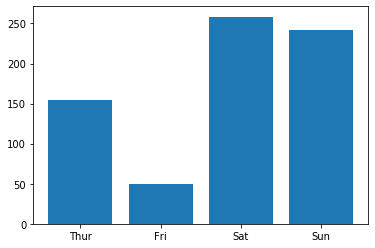

In [204]:
plt.bar(df['tip'].index, df['tip'])

In [ ]:
# 1-2) 요일별 파티 사이즈별 파티 횟수 카운트 하여 막대그래프 시각화(size 2,3,4인만 카운트)

In [163]:
size1 = tips[tips['size']==1].index
size5 = tips[tips['size']==5].index
size6 = tips[tips['size']==6].index

In [164]:
tips2 = tips.drop(size1)
tips2 = tips2.drop(size5)
tips2 = tips2.drop(size6)

In [165]:
df2_1 = tips2.groupby('day').agg('count')

In [166]:
df2_2 = tips2.groupby('size').agg('count')

In [167]:
df2_1

,total_bill,tip,smoker,time,size
day,,,,,
Fri,18,18,18,18,18
Sat,84,84,84,84,84
Sun,72,72,72,72,72
Thur,57,57,57,57,57


In [168]:
df2_2

,total_bill,tip,smoker,day,time
size,,,,,
2,156,156,156,156,156
3,38,38,38,38,38
4,37,37,37,37,37


In [205]:
np.linspace(0,100,10+1)

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

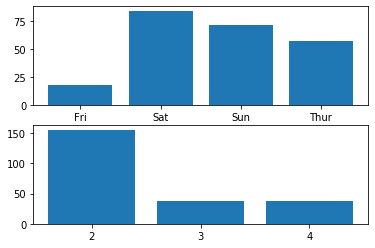

In [215]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.bar(df2_1.index, df2_1['tip'])
ax2.bar(df2_2.index, df2_2['smoker'])
ax2.set_xticks(np.linspace(2,4,3))
plt.show()

In [ ]:
# 2. 아래와 같이 아이리스 데이터의 petal length와 petal width간의 산점도를 그리고 레전드 표현

In [29]:
import seaborn as sns
iris = sns.load_dataset('iris')
import matplotlib.pyplot as plt

In [45]:
groups = iris.groupby('species')

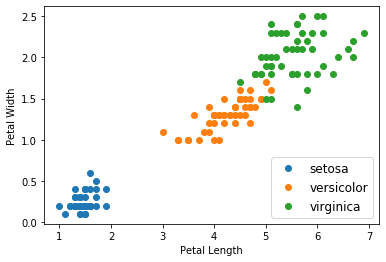

In [65]:
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.petal_length, group.petal_width, marker = 'o', linestyle = '', label = name)
ax.legend(fontsize=12, loc = 'lower right')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

In [216]:
# 3. 서울에 위치한 스타벅스 매장정보 수집

매장명 위도 경도 매장타입 주소 전화번호

In [356]:
from bs4 import BeautifulSoup
from selenium import webdriver
import re
import time

chrome_loc = 'C:/chrome/chromedriver.exe'
driver = webdriver.Chrome(chrome_loc)
url_target = 'https://www.starbucks.co.kr/store/store_map.do?disp=locale'
driver.get(url_target)

loca = driver.find_element_by_class_name('loca_search') 
loca.click()

sido = driver.find_element_by_class_name('sido_arae_box') 
li=sido.find_elements_by_tag_name('li') 
li[0].click() 
time.sleep(5)

gugun = driver.find_element_by_class_name('gugun_arae_box') 
li=gugun.find_elements_by_tag_name('li') 
li[0].click()
time.sleep(5)

In [358]:
star_html = driver.page_source
sb = BeautifulSoup(star_html, 'html.parser')

In [396]:
star = sb.select('li.quickResultLstCon')[0]

In [401]:
star

<li class="quickResultLstCon" data-code="3762" data-hlytag="null" data-index="0" data-lat="37.501087" data-long="127.043069" data-name="역삼아레나빌딩" data-storecd="1509" style="background:#fff"> <strong data-my_siren_order_store_yn="N" data-name="역삼아레나빌딩" data-store="1509" data-yn="N">역삼아레나빌딩  </strong> <p class="result_details">서울특별시 강남구 언주로 425 (역삼동)<br/>1522-3232</p> <i class="pin_general">리저브 매장 2번</i></li>

In [398]:
star['data-name'] # 매장명

'역삼아레나빌딩'

In [399]:
star['data-lat'] # 위도

'37.501087'

In [400]:
star['data-long'] # 경도

'127.043069'

In [413]:
star.select('i')[0]['class'][0][4:] # 매장타입

'general'

In [429]:
str(star.select('p')[0]).split('<br/>')[0].split('>')[1] # 주소

'서울특별시 강남구 언주로 425 (역삼동)'

In [432]:
str(star.select('p')[0]).split('<br/>')[1].split('<')[0] # 전화번호

'1522-3232'

In [436]:
starbucks_store = sb.select('li.quickResultLstCon')

In [441]:
df = []
for i in starbucks_store:
    name = i['data-name']
    lat = i['data-lat']
    long = i['data-long']
    type = i.select('i')[0]['class'][0][4:]
    add = str(i.select('p')[0]).split('<br/>')[0].split('>')[1]
    num = str(i.select('p')[0]).split('<br/>')[1].split('<')[0]
    
    df.append([name, lat, long, type, add, num])

In [446]:
df = pd.DataFrame(df)

In [447]:
df.columns = ['매장명','위도','경도','매장타입','매장주소','전화번호']

In [448]:
df

,매장명,위도,경도,매장타입,매장주소,전화번호
0,역삼아레나빌딩,37.501087,127.043069,general,서울특별시 강남구 언주로 425 (역삼동),1522-3232
1,논현역사거리,37.510178,127.022223,general,서울특별시 강남구 강남대로 538 (논현동),1522-3232
2,신사역성일빌딩,37.514132,127.020563,general,서울특별시 강남구 강남대로 584 (논현동),1522-3232
3,국기원사거리,37.499517,127.031495,general,서울특별시 강남구 테헤란로 125 (역삼동),1522-3232
4,스탈릿대치R,37.494668,127.062583,reserve,서울특별시 강남구 남부순환로 2947 (대치동),1522-3232
...,...,...,...,...,...,...
546,사가정역,37.579594,127.087966,general,서울특별시 중랑구 면목로 310,1522-3232
547,상봉역,37.59689,127.08647,general,서울특별시 중랑구 망우로 307 (상봉동),1522-3232
548,묵동이마트,37.613433,127.077484,general,"서울특별시 중랑구 동일로 932 (묵동, 묵동자이아파트) (묵동이마트 B1층)",1522-3232
549,묵동,37.615368,127.076633,general,서울특별시 중랑구 동일로 952,1522-3232
